In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [4]:
sample_sizes = [5423]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")
atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [5]:
test_mcms = atest_mcms[:,0,0]
test_probs = atest_probs[:,0,0]


In [6]:
per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1)

In [7]:
# digitwise accuracy
max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
digit_accu
# np.mean(digit_accu)

[0.9730941704035875,
 0.9775784753363229,
 0.9495515695067265,
 0.929372197309417,
 0.9226457399103138,
 0.9204035874439462,
 0.945067264573991,
 0.9047085201793722,
 0.8878923766816144,
 0.8957399103139013]

In [9]:
# predicted_labels_per_image


In [14]:
# for every set of testimages, compute 

predicted_labels_per_image = np.argmax(per_image_prob,axis=0)
arr = predicted_labels_per_image[0]

np.unique(arr, return_counts=True)
v, c = np.unique(predicted_labels_per_image, return_counts=True,axis=1)
unqs = [np.unique(arr, return_counts=True) for arr in predicted_labels_per_image]

idx_arr = np.zeros((10,10))
for i in range(10):
    idx_arr[i][unqs[i][0]] = unqs[i][1]

idx_arr


np.fill_diagonal(idx_arr, 0)
# np.fill_diagonal(idx_arr,idx_arr.max())
idx_arr


# unqs[i][0]

array([[ 0.,  0.,  3.,  1.,  0.,  5.,  3.,  2.,  9.,  1.],
       [ 0.,  0.,  6.,  1.,  1.,  0.,  3.,  1.,  8.,  0.],
       [ 4.,  2.,  0., 10.,  6.,  1.,  3.,  8., 10.,  1.],
       [ 1.,  0., 15.,  0.,  1., 30.,  0.,  6.,  9.,  1.],
       [ 0.,  1.,  4.,  1.,  0.,  1.,  8.,  4.,  9., 41.],
       [ 8.,  2.,  0., 26.,  0.,  0.,  8.,  0., 22.,  5.],
       [11.,  4.,  4.,  2.,  4., 12.,  0.,  1., 11.,  0.],
       [ 1.,  7., 19.,  2.,  5.,  3.,  0.,  0., 10., 38.],
       [ 5.,  4., 16., 28.,  5., 15.,  8.,  7.,  0., 12.],
       [ 6.,  3.,  6., 15., 22.,  9.,  0., 19., 13.,  0.]])

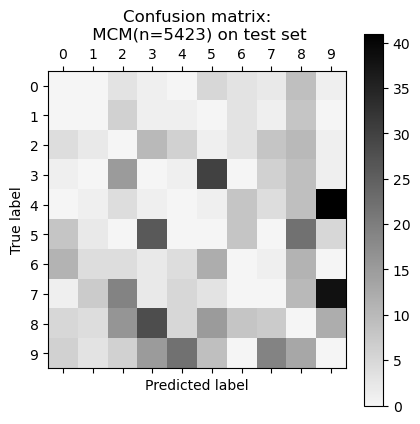

In [15]:
myplot.plot_confusion_matrix(idx_arr,10,logScale=False,cmap=myplot.cmap_to_gray("black",reverse=True),title="Confusion matrix:\n MCM(n=5423) on test set")